# 06 : Classification

### 06-01 : Graphviz

#### 01 : setting

In [1]:
import pandas as pd
import numpy as np
import sklearn
from IPython.display import display
import graphviz

import warnings
warnings.filterwarnings('ignore')

#### 02 : Data set / ML learn

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# DecisionTree Clf 객체생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 데이터 로딩, train/test 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 11)

# ML 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

#### 03 : export_graphviz 

    from sklearn.tree import export_graphviz
    export_graphviz( estimator, outfile = file_name.dot, class_names = 'df_label_names', feature_names = 'df_feature_names', impurity = , filled = )

In [3]:
from sklearn.tree import export_graphviz
    # Tree 모델에 대한 내부를 보여주는 Utiliy

# export_graphvz() 호출 결과로 out_file()로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris.target_names, feature_names = iris.feature_names, impurity = True, filled = True)
    # dt_clf
        # estimator 이름
    # out_file = 'tree.dot'
        # 저장할 graphviz 파일 이름
        # 저장위치는 동일 디렉토리
    # class_names = 'iris.target_names'
        #
    # feature_names = 'iris.feature_names'
        #
    # impurity = True
        #
    # filled = True
        #


#### 04 : graphviz

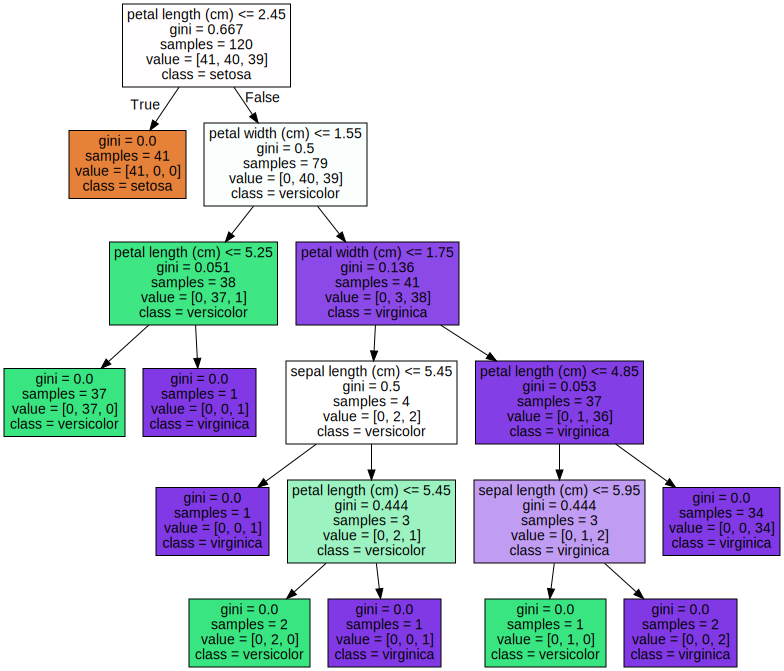

In [4]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### 05 : feature importance

Feature importance : 
 [0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.0
petal length (cm) : 0.555
petal width (cm) : 0.42


<AxesSubplot:>

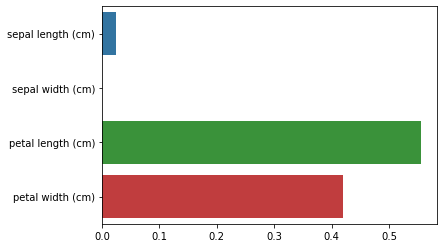

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# feature importance 추출
print('Feature importance : \n {}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 importance 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_) :
    print('{} : {:.3}'.format(name, value))

# feature importance 를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

## 06-02 : Over fitting

### 01 : Sample make
    from sklearn.datasets import make_classification
    X_feature, y_label = make_classifiaction(n_fitures = , n_redundant = , n_imformative = , n_classes = , n_clusters_per_class = , random_state = )

X_features.shape :  (100, 2)
y_labels.shape :  (100,)
y_labels.value_count() 
 0    34
1    33
2    33
dtype: int64


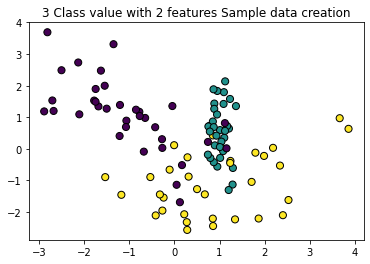

In [6]:
from sklearn.datasets import make_classification    # 임이의 feature / label data set 을 생성해 주는 API
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class value with 2 features Sample data creation')

# make_classification 을 통해 원하는 샘플 데이터 생성
    # n_features
        # feature 종류 2개 (n_features)
            # 독립변수 중 종속변수와 상관관계가 있는 성분의 수
                # 종속변수에 직접적으로 영향을 주는 독립변수의 수
        # n_redundant
            # 독립변수 중 다른 독립변수와 선형적 조합으로 나타나는 성분의 수
                # 소거가 가능한 독립변수 의 수
    # n_classes
        # class(label) 종류
    # n_clusters_per_class
        # class 당 cluster(군집)의 수
    # X
        # 독립변수
    # y
        # 종속변수
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,\
                                            n_classes=3, n_clusters_per_class=1, random_state=0)

print('X_features.shape : ',X_features.shape)
y_labels_df = pd.DataFrame(y_labels)
print('y_labels.shape : ',y_labels.shape)
print('y_labels.value_count() \n',y_labels_df.value_counts())

plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=50, edgecolors='k')
    # x축 : X_features[:,0]
    # y축 : X_features[:,1]
    # marker : o
    # c = color 선별 기준 : y_label 
    # s = marker size
    # edgecolor : 그래프 경계선 컬러 : 검정

### 02 : Cluster Visualize setting
- 현재는 조금 어려움 나중에 천천히 배우자

In [7]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

### 03 : Classifier Result Analysis 

#### Under-fitting vs Over-fitting

Default
- Over-fitting

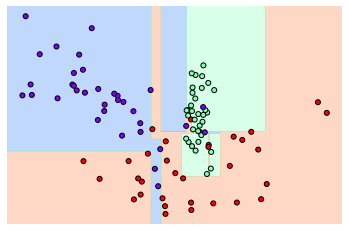

In [8]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리생성
    # 조건 : 제약 없음
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

min_samples_leaf
- Under-fitting

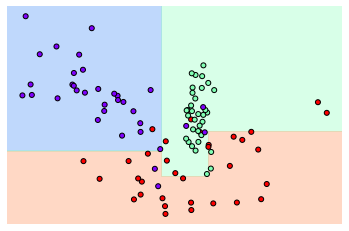

In [9]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리생성
    # 조건 : 제약 없음
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=6)
dt_clf.fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

## 06-03 : DecisionTree_Clf EX
Human Activity Recognition

### 01 : Data load

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 로드 및 정규표현식 DF 변환
feature_df = pd.read_csv('./human_activity/features.txt', sep = '\s+', header = None, names = ['column_index', 'column_name'])
display(feature_df.head(3))
    # index 와 feature_name 이 공백으로 분리되어 있음
        # sep : 정규표현식으로 사용하여 분리
            # \s : 공백
            # + : 1개 이상
        # header : 
        # names : colums 지정

# 피처명 index 를 제거하고 피처명만 리스트 객체로 생성한 뒤 샘플로 10개 만 추출
feature_name = feature_df.iloc[:,1].values.tolist()
    # .values : DF -> ndarray
    # tolist() : ndarray -> List
print('전체 피처명에서 10개만 추출 : ',feature_name[:10])


,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z


전체 피처명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


### 02 : Feature check
- 앞으로 사용될 column 중에 중복된 column_name 이 있는지 사전에 점검
- 검사방법
    - Groupby 를 column_name 으로 진행
    - 통일한 column_name 을 갖는것으로 분류된 columns_index 추출

    A.groupb('column_name').count()

In [34]:
# column_name 으로 groupby 를 통해 동일 인자를 갖고 있는 것끼리 묶음
feature_dup_df = feature_df.groupby('column_name').count()
display('feauture_name 으로 groupby 결과',feature_dup_df.head(3))

# groupby 를 진행한 DF 에서 count 값이 1 초과인, 즉 중복된 값을 갖는 coulumn name 의 갯수 출력
display('중복 column_name 을 갖는 index 수',feature_dup_df[feature_dup_df['column_index'] > 1].count())

# count 값이 1 초과(중복)인 column_name 을 5개만 대표로 추출
display('중복인 column_name 샘플 10개',feature_dup_df[feature_dup_df['column_index'] > 1].head(5))

'feauture_name 으로 groupby 결과'

,column_index
column_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1


'중복 column_name 을 갖는 index 수'

column_index    42
dtype: int64

'중복인 column_name 샘플 10개'

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


### 03 : Encoding Def

In [42]:
def get_new_feature_name_df(old_feature_name_df) :
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])\
                                                                                                 if x[1] > 0 else x[0], axis =1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis =1)

    return new_feature_name_df

In [38]:
df = pd.DataFrame([['a'], ['a'], ['a'], ['b'], ['b'], ['a']], columns=['A'])
display(df)
df.groupby('A').cumcount()

,A
0,a
1,a
2,a
3,b
4,b
5,a


0    0
1    1
2    2
3    0
4    1
5    3
dtype: int64

### 04 : Reload Data set

In [43]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_df = pd.read_csv('./human_activity/features.txt',sep='\s+', header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [46]:
print('## 학습 피처 데이터 셋 info()')
print(X_train.info())

## 학습 피처 데이터 셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [47]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


### 05 : Basic predict

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# 예제 반복 시 마다 동일한 예측결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
basic_score = accuracy_score(y_test, pred)
print('Basic 예측 정확도 : {:.4}'.format(basic_score))

# Basic DecisionTreeClassifier 의 하이퍼 파라미터 추출
basic_param = dt_clf.get_params()
print('Basic DecisionTreeClassFier 하이퍼 파라이터 : \n', basic_param)

Basic 예측 정확도 : 0.8548
Basic DecisionTreeClassFier 하이퍼 파라이터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


### 06 : GridSearchCV
- 최적 파라미터 추출

#### Train set

    params = {'max_depth' = [], 'min_sample_split' = [], 'min_sample_leaf' = [], ...}
    grid_cv = GridSearchCV(estimator, param_grid = params, scoring = '', cv = , verbose = )

In [58]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],        # tree depth 상한 제한
    'min_samples_split' : [16] # 샘플이 16개 이하면 만족
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
    # dl_clf : estimator
    # param_grid : 설정한 GridSearchCV parameter
    # scoring : 평가지표
    # cv : staritified KFold 폴딩 세트 수
    # verbose : 결과 출력방식
        # 1 : 폴드수 / 대상수(뎁스 종류) / 검증 종류
        # 2 : 계산시간 추가
        # 3 : scoring 추가
grid_cv.fit(X_train, y_train)
grid_cv_param = grid_cv.best_params_
print('GridSearchCV 최고 평균 정확도 수치 : {:.4}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : \n',grid_cv_param)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터 : 
 {'max_depth': 8, 'min_samples_split': 16}


Get Result
- 아래와 같은 조건일때 train set 에서 85.4% 최고 성능을 나타냄을 볼 수 있었고 그 이후(max_depth증가)로는 과적합이 발생함을 볼 수 있다 
    - cv (stfKFold) = 5
    - max_depth = 8
    - min_sample_split = 16

In [61]:
# GridSearchCV 객체의 cv_result_ 속성을 DF으로 생성
cv_result_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(evaluation)셋 학습 데이터 셋의 정확도 수치 추출
display(cv_result_df[['param_max_depth', 'mean_test_score']])
display(cv_result_df)

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.870225,0.015554,0.004560,0.000308,6,16,"{'max_depth': 6, 'min_samples_split': 16}",0.813732,0.868117,0.819728,0.866667,0.870068,0.847662,0.025350,5
1,2.338128,0.040641,0.004130,0.000175,8,16,"{'max_depth': 8, 'min_samples_split': 16}",0.806254,0.830048,0.860544,0.874830,0.902721,0.854879,0.033764,1
2,2.761371,0.081387,0.004206,0.000120,10,16,"{'max_depth': 10, 'min_samples_split': 16}",0.804895,0.816451,0.866667,0.884354,0.891156,0.852705,0.035427,2
3,3.086115,0.149530,0.004242,0.000109,12,16,"{'max_depth': 12, 'min_samples_split': 16}",0.798097,0.810333,0.851020,0.884354,0.885034,0.845768,0.036295,7
4,3.430749,0.261631,0.004278,0.000112,16,16,"{'max_depth': 16, 'min_samples_split': 16}",0.800816,0.815092,0.858503,0.876871,0.884354,0.847127,0.033379,6
5,3.480885,0.318829,0.004247,0.000119,20,16,"{'max_depth': 20, 'min_samples_split': 16}",0.798097,0.815092,0.858503,0.876871,0.894558,0.848624,0.036559,3
6,3.469943,0.310441,0.004133,0.000253,24,16,"{'max_depth': 24, 'min_samples_split': 16}",0.798097,0.815092,0.858503,0.876871,0.894558,0.848624,0.036559,3


#### Test set
- train set 에서 진행했던 max_depth 조건을 그대로 가져와 test set 에서도 동일한 결과가 나오는지 확인해 보자

Result recheck

In [66]:
max_depth = [6, 8, 10, 12, 16, 20, 24]

# max_depth 값을 변화 시키면서 그떄마다 학습결과 측정/출력
for depth in max_depth :
    dt_clf = DecisionTreeClassifier(max_depth = depth, min_samples_split = 16, random_state = 156)
    dt_clf.fit(X_train, y_train)
    grid_pred = dt_clf.predict(X_test)
    grid_score = accuracy_score(y_test, grid_pred)
    print('max_depth = {:>2} 일때 정확도 : {:.4} %'.format(depth, grid_score*100))

max_depth =  6 일때 정확도 : 85.51 %
max_depth =  8 일때 정확도 : 87.17 %
max_depth = 10 일때 정확도 : 85.99 %
max_depth = 12 일때 정확도 : 85.71 %
max_depth = 16 일때 정확도 : 85.99 %
max_depth = 20 일때 정확도 : 85.65 %
max_depth = 24 일때 정확도 : 85.65 %


Using best parameter   

        .best_estimator_

In [67]:
best_grid_cv_dt_clf = grid_cv.best_estimator_
best_grid_cv_pred = best_grid_cv_dt_clf.predict(X_test)
best_grid_cv_score = accuracy_score(y_test, best_grid_cv_pred)
print('하이퍼 파라미터 튜닝된 최종 DecisionTree Classifier 예측 정확도 : {:.4} %'.format(best_grid_cv_score * 100))

하이퍼 파라미터 튜닝된 최종 DecisionTree Classifier 예측 정확도 : 87.17 %


### Feature Importance

    .feature_importance_

In [78]:
f_importance_ar = best_grid_cv_dt_clf.feature_importances_
print(f_importance_ar.shape, type(f_importance_ar))
display(f_importance_ar)

(561,) <class 'numpy.ndarray'>


array([0.        , 0.        , 0.        , 0.        , 0.00175182,
       0.        , 0.        , 0.        , 0.        , 0.00217984,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00034009, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00997154, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00122902,
       0.00629033, 0.        , 0.2533544 , 0.002077  , 0.00291231,
       0.        , 0.        , 0.02047009, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0024461 , 0.        , 0.        ,
       0.        , 0.00302454, 0.        , 0.        , 0.10188

,0
tBodyAcc-mean()-X,0.000000
tBodyAcc-mean()-Y,0.000000
tBodyAcc-mean()-Z,0.000000
tBodyAcc-std()-X,0.000000
tBodyAcc-std()-Y,0.001752


,importance
tGravityAcc-min()-X,0.253354
"fBodyAccJerk-bandsEnergy()-1,16",0.212584
"angle(Y,gravityMean)",0.139001
fBodyAccMag-energy(),0.115478
"tGravityAcc-arCoeff()-Z,2",0.101885


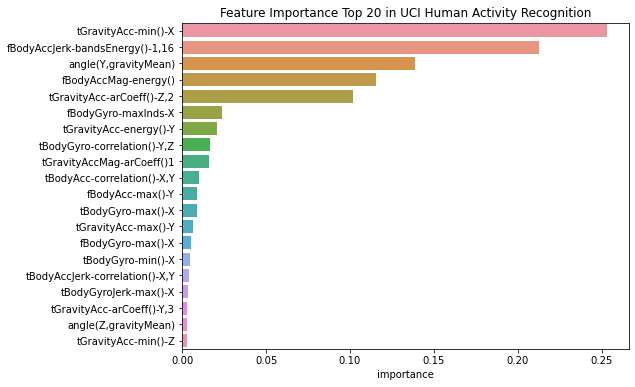

In [104]:
import seaborn as sns

# 데이터를 알아보기 쉽도록 ndarray -> DF 변환
f_importance_df = pd.DataFrame(f_importance_ar, index=X_train.columns)
display(f_importance_df.head(5))

# 중요도 순으로 DF 정렬
f_importance_df.sort_values(by = 0, ascending = False, inplace = True)
f_importance_df['importance'] = f_importance_df[0]
f_importance_df.drop(0, axis=1, inplace=True)
display(f_importance_df.head(5))

# plot
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20 in UCI Human Activity Recognition')
f_im_top20 = f_importance_df[:20]
sns.barplot(x = f_im_top20['importance'], y = f_im_top20.index)
plt.show()